In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [3]:
data = pd.read_csv('/content/Titanic_train.csv')
data1 = pd.read_csv('/content/Titanic_test.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
for col in data.columns:
    null_percent = data[col].isnull().mean() * 100
    print(f"Null value Percentage of {col} column is {null_percent:.2f}")


Null value Percentage of PassengerId column is 0.00
Null value Percentage of Survived column is 0.00
Null value Percentage of Pclass column is 0.00
Null value Percentage of Name column is 0.00
Null value Percentage of Sex column is 0.00
Null value Percentage of Age column is 19.87
Null value Percentage of SibSp column is 0.00
Null value Percentage of Parch column is 0.00
Null value Percentage of Ticket column is 0.00
Null value Percentage of Fare column is 0.00
Null value Percentage of Cabin column is 77.10
Null value Percentage of Embarked column is 0.22


In [12]:
data.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis = 1, inplace = True)
data['Age'] = data['Age'].fillna(data['Age'].median())
data.dropna(inplace = True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
data1.duplicated().sum()

np.int64(0)

In [14]:
data1.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [15]:
data1.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis = 1, inplace = True)
data1['Age'] = data1['Age'].fillna(data1['Age'].median())
data1.dropna(inplace = True)

In [16]:
data1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

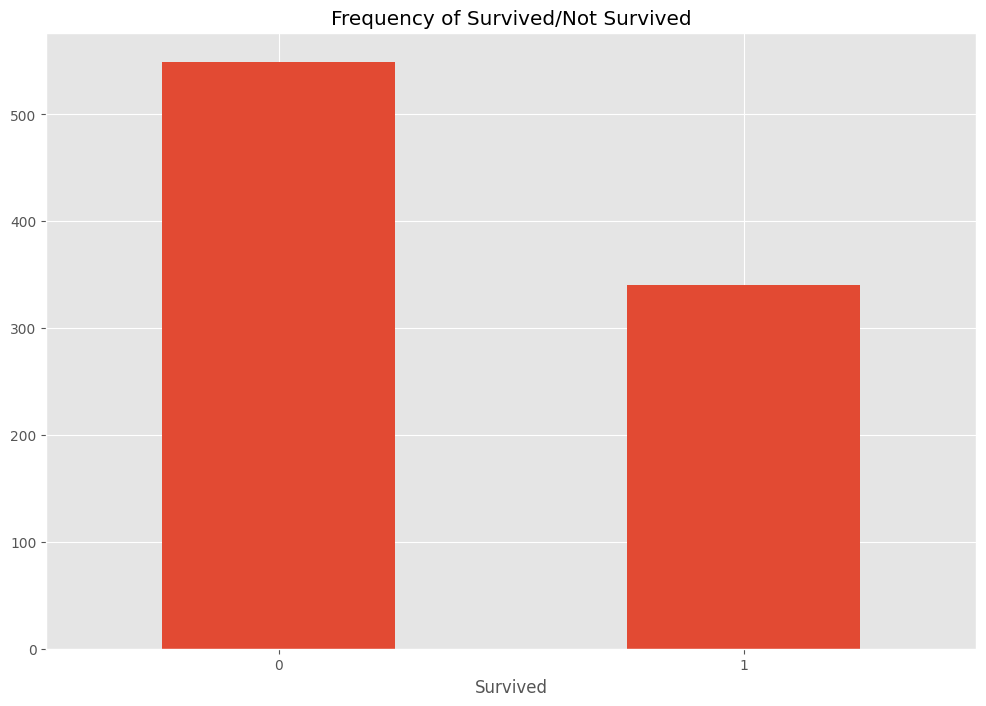

In [17]:
data['Survived'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Survived/Not Survived')
plt.xticks(rotation=0)


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

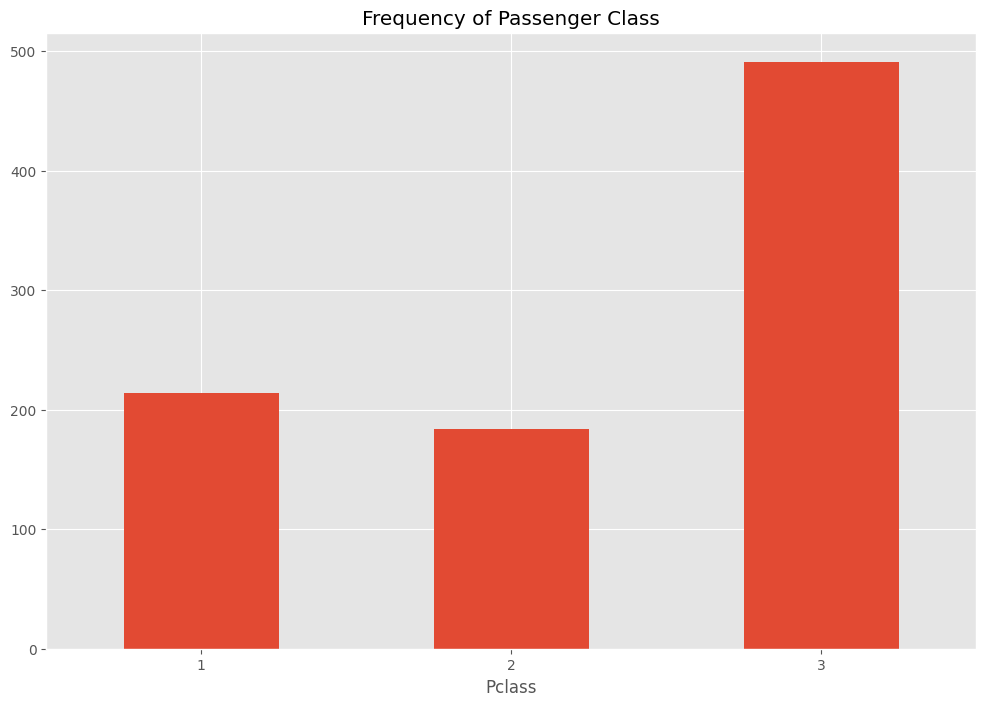

In [18]:
data['Pclass'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Passenger Class')
plt.xticks(rotation=0)


(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

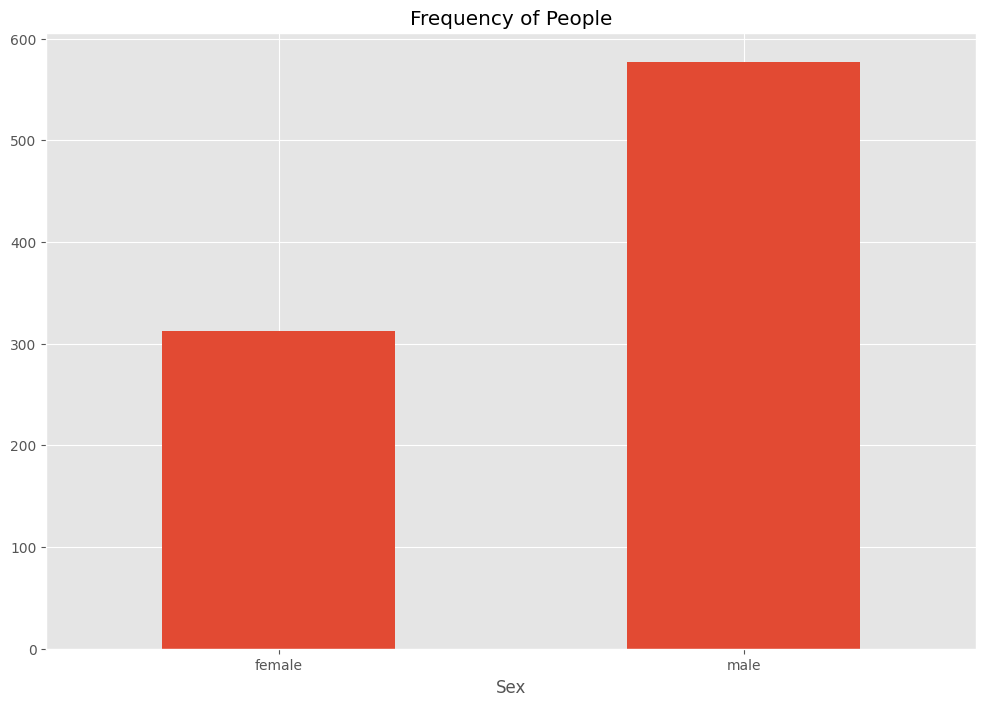

In [19]:
data['Sex'].value_counts().sort_index().plot.bar()
plt.title('Frequency of People')
plt.xticks(rotation=0)



Text(0.5, 1.0, 'Distribution of Age')

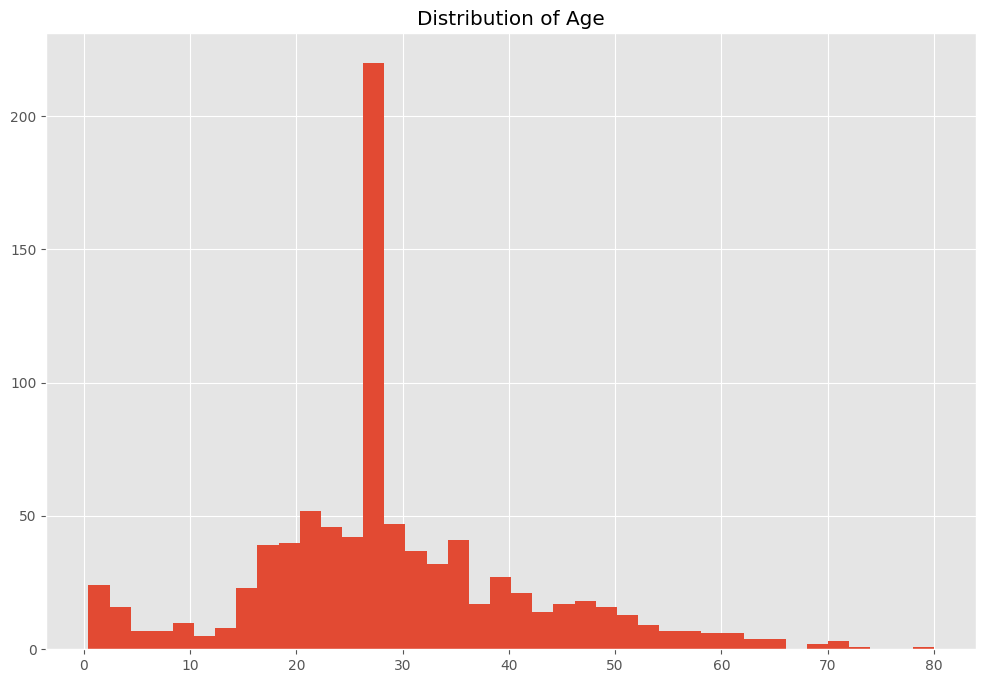

In [20]:
ages = data['Age']
plt.hist(ages, bins=40)
plt.title('Distribution of Age')


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '8')])

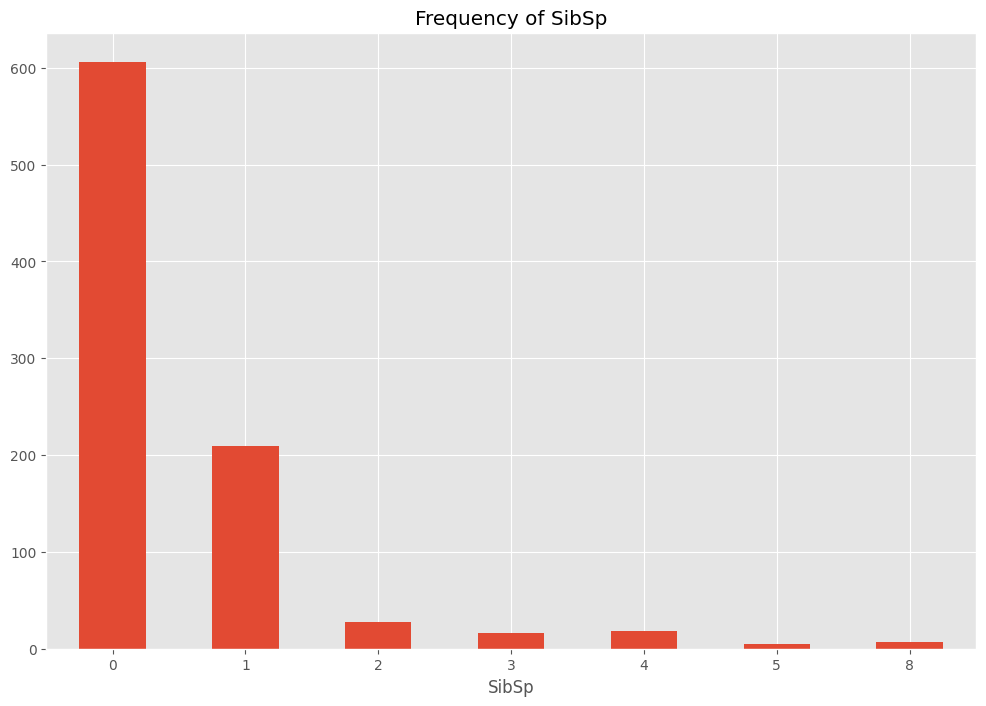

In [21]:
data['SibSp'].value_counts().sort_index().plot.bar()
plt.title('Frequency of SibSp')
plt.xticks(rotation=0)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

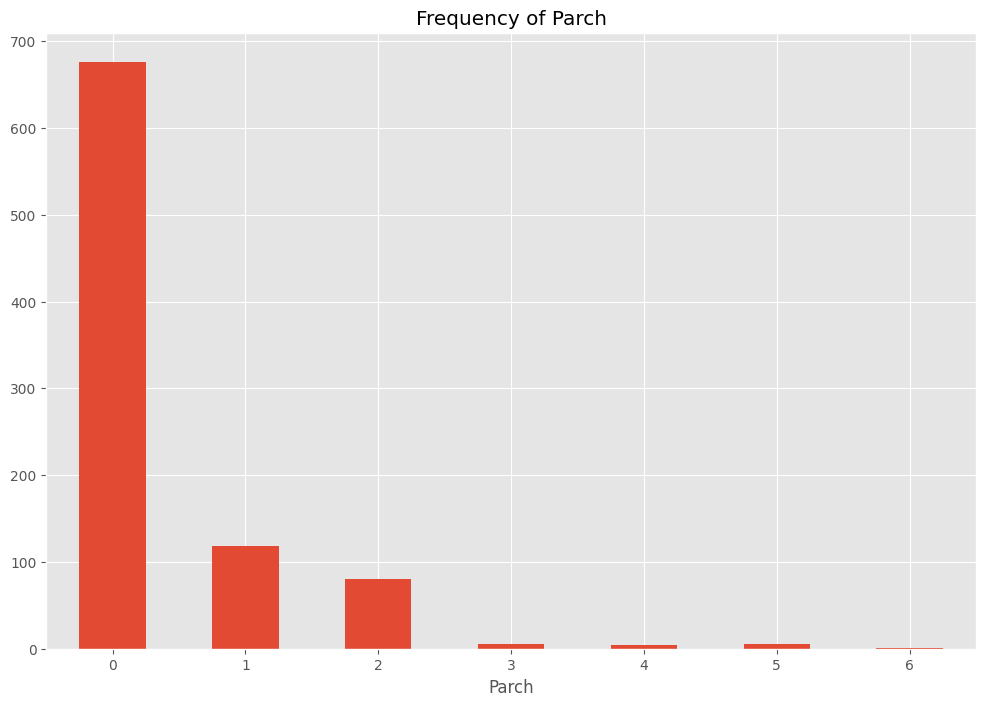

In [22]:
data['Parch'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Parch')
plt.xticks(rotation=0)


Text(0.5, 1.0, 'Distribution of Fare')

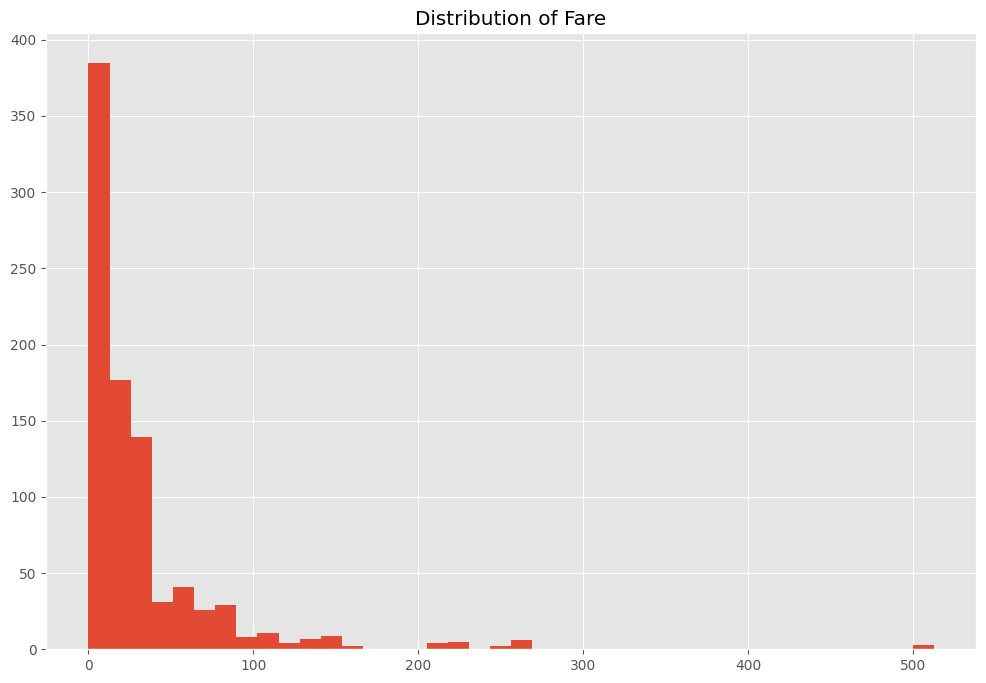

In [23]:
fare = data['Fare']
plt.hist(fare, bins=40)
plt.title('Distribution of Fare')


(array([0, 1, 2]), [Text(0, 0, 'C'), Text(1, 0, 'Q'), Text(2, 0, 'S')])

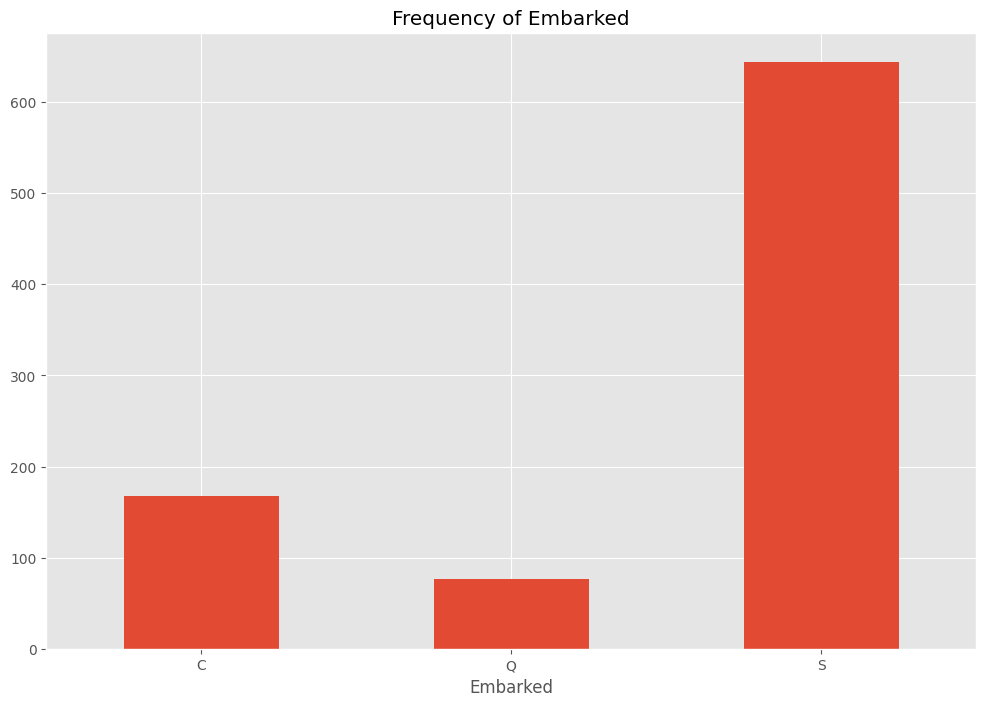

In [24]:
data['Embarked'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Embarked')
plt.xticks(rotation=0)


In [25]:
encode_col = ['Sex', 'Embarked']
encode_data = pd.get_dummies(data[encode_col], drop_first=True, prefix=encode_col).astype(int)
data = pd.concat([data, encode_data], axis=1)


In [26]:
encode_col_1 = ['Sex', 'Embarked']
encode_data = pd.get_dummies(data1[encode_col_1], drop_first=True, prefix=encode_col_1).astype(int)
data1 = pd.concat([data1, encode_data], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,0,3,female,28.0,1,2,23.4500,S,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [27]:
data.drop(['Embarked', 'Sex'], axis = 1, inplace = True)

In [28]:
data1.drop(['Embarked', 'Sex'], axis = 1, inplace = True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [29]:
x = data.drop('Survived', axis = 1)
y = data[['Survived']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [31]:
data1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,27.0,0,0,8.0500,1,0,1


In [32]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

In [33]:
xgb = XGBClassifier()
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [34]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.8410617551462621


In [35]:
grid_lgb = GridSearchCV(estimator=LGBMClassifier(verbose = -1), param_grid=param_grid, cv=5, scoring='accuracy')
grid_lgb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-1),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [36]:
print("Best Parameters (LGBM):", grid_lgb.best_params_)
print("Best Cross-Validated Accuracy (LGBM):", grid_lgb.best_score_)

Best Parameters (LGBM): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validated Accuracy (LGBM): 0.8396533044420369


In [37]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 7, n_estimators = 200, subsample = 0.8)
xgb.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = xgb.predict(x_test)

In [39]:
print(f'Training Accuracy: {xgb.score(x_train, y_train)}')
print(f'Testing Acccuracy: {xgb.score(x_test, y_test)}')

Training Accuracy: 0.890295358649789
Testing Acccuracy: 0.8707865168539326


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       109
           1       0.87      0.78      0.82        69

    accuracy                           0.87       178
   macro avg       0.87      0.85      0.86       178
weighted avg       0.87      0.87      0.87       178



In [41]:
lgb = LGBMClassifier()
lgb.set_params(verbosity=-1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8)
lgb.fit(x_train, y_train)


LGBMClassifier(max_depth=5, subsample=0.8, verbosity=-1)

In [42]:
y_pred_1 = lgb.predict(x_test)

In [43]:
print(f'Training Accuracy: {lgb.score(x_train, y_train)}')
print(f'Testing Acccuracy: {lgb.score(x_test, y_test)}')

Training Accuracy: 0.9170182841068917
Testing Acccuracy: 0.797752808988764


In [44]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [45]:
test_xgb_pred = xgb.predict(data1)

In [46]:
test_lgb_pred = lgb.predict(data1)

In [49]:
data1['Xgb_Survived'] = test_xgb_pred
data1['lgb_Survived'] = test_lgb_pred
data1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Xgb_Survived,lgb_Survived
0,3,34.5,0,0,7.8292,1,1,0,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0
2,2,62.0,0,0,9.6875,1,1,0,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1,0,1,0,0
414,1,39.0,0,0,108.9000,0,0,0,1,1
415,3,38.5,0,0,7.2500,1,0,1,0,0
416,3,27.0,0,0,8.0500,1,0,1,0,0


In [50]:
data1[data1['Xgb_Survived'] == data1['lgb_Survived']]

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Xgb_Survived,lgb_Survived
0,3,34.5,0,0,7.8292,1,1,0,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0
2,2,62.0,0,0,9.6875,1,1,0,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1,0,1,0,0
414,1,39.0,0,0,108.9000,0,0,0,1,1
415,3,38.5,0,0,7.2500,1,0,1,0,0
416,3,27.0,0,0,8.0500,1,0,1,0,0
